In [50]:
import pandas as pd 
import matplotlib 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import datetime as dt
import plotly.express as px
import plotly.io as pio

In [51]:
circuits = pd.read_csv('../Group_3_Project/F1 CSV Datasets/circuits.csv', index_col=0, na_values=r'\N')
laptimes = pd.read_csv('../Group_3_Project/F1 CSV Datasets/lap_times.csv',index_col=0, na_values=r'\N')
pitstops = pd.read_csv('../Group_3_Project/F1 CSV Datasets/pit_stops.csv',index_col=0, na_values=r'\N')
seasons = pd.read_csv('../Group_3_Project/F1 CSV Datasets/seasons.csv',index_col=0, na_values=r'\N')
status = pd.read_csv('../Group_3_Project/F1 CSV Datasets/status.csv',index_col=0, na_values=r'\N')
constructor_standings = pd.read_csv('../Group_3_Project/F1 CSV Datasets/constructor_standings.csv',index_col=0, na_values=r'\N')
constructors = pd.read_csv('../Group_3_Project/F1 CSV Datasets/constructors.csv',index_col=0, na_values=r'\N')
driver_standings = pd.read_csv('../Group_3_Project/F1 CSV Datasets/driver_standings.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv('../Group_3_Project/F1 CSV Datasets/drivers.csv',index_col=0, na_values=r'\N')
races = pd.read_csv('../Group_3_Project/F1 CSV Datasets/races.csv',index_col=0, na_values=r'\N')
constructor_results = pd.read_csv('../Group_3_Project/F1 CSV Datasets/constructor_results.csv',index_col=0, na_values=r'\N')
results = pd.read_csv('../Group_3_Project/F1 CSV Datasets/results.csv',index_col=0, na_values=r'\N')
qualifying = pd.read_csv('../Group_3_Project/F1 CSV Datasets/qualifying.csv',index_col=0, na_values=r'\N')
pd.get_option("display.max_columns",None)


races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
pitstops = pitstops.rename(columns={'time':'pitTime'})
pitstops['seconds'] = pitstops['milliseconds'].apply(lambda x: x/1000)
results['seconds'] = results['milliseconds'].apply(lambda x: x/1000)

circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})

In [52]:
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

In [78]:
newresults = pd.merge(results,races,left_on='raceId',right_index=True,how='left')
newresults = pd.merge(newresults,circuits,left_on='circuitId',right_index=True,how='left')
newresults = pd.merge(newresults, constructors,left_on='constructorId', right_index=True, how='left')


In [79]:
newpitstops = pd.merge(pitstops,races,left_on='raceId',right_index=True,how='left')
newpitstops = pd.merge(newpitstops, circuits,left_on='circuitId',right_index=True,how='left')
newpitstops = pd.merge(newpitstops,newresults[['raceId', 'driverId','constructorName','constructorId']],left_on=['raceId','driverId'],right_on=['raceId','driverId'])


In [56]:
Pitstop_data_race = newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:10].keys().tolist(),:]['circuitId'].unique()

In [58]:
Threshold = newpitstops['seconds'].sort_values(ascending= True)[:100].quantile(0.10)

In [59]:
headings = ['circuitName','circuitLocation','circuitCountry']
l1=newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitName'][newpitstops['seconds']<Threshold].unique()
l2=newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitLocation'][newpitstops['seconds']<Threshold].unique()
l3=newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitCountry'][newpitstops['seconds']<Threshold].unique()
circuit_dict = {'circuitName': l1, 'circuitLocation': l2,'circuitCountry': l3}

In [60]:
sorted_newpitstops = newpitstops.sort_values(by='seconds', ascending=False)

In [61]:
c_headings = ['constructorId','constructorName']
c1 = newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorName'][newpitstops['seconds']<Threshold].unique()
c2 = newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorId'][newpitstops['seconds']<Threshold].unique()

In [63]:
Pitstop_newcircuits= newpitstops[newpitstops['circuitName'].isin(l1) & newpitstops['constructorName'].isin(c1)]

In [125]:
fig = px.scatter(newpitstops[newpitstops['seconds']<50],
                 x='date',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Durations over Time by Constructor',
)
fig.show()

print("The scatter plot below shows the pitstop times of each team from years 2015 to 2022, the cluster of datapoints shows the average times and the outliers. The outliers below the average show the teams who excell in pitstiops and the outliers above the clustered average shows which teams do not excell in pitstops.")

The scatter plot below shows the pitstop times of each team from years 2015 to 2022, the cluster of datapoints shows the average times and the outliers. The outliers below the average show the teams who excell in pitstiops and the outliers above the clustered average shows which teams do not excell in pitstops.


In [116]:
pd.set_option('display.max_colwidth', None)
Pitstop_newcircuits[Pitstop_newcircuits['seconds']>50]

,raceId,driverId,stop,lap,pitTime,duration,milliseconds,seconds,year,round,...,circuitRef,circuitName,circuitLocation,circuitCountry,lat,lng,alt,circuitUrl,constructorName,constructorId
4213,936,8,5,52,15:27:47,59.555,59555,59.555,2015,10,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Ferrari,6
8417,1062,830,2,2,15:08:31,24:16.349,1456349,1456.349,2021,11,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Red Bull,9
8429,1062,1,1,2,15:07:57,24:09.259,1449259,1449.259,2021,11,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Mercedes,131
8439,1062,832,1,2,15:08:04,24:12.527,1452527,1452.527,2021,11,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Ferrari,6
8445,1062,849,1,2,15:08:10,24:14.435,1454435,1454.435,2021,11,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Williams,3
8451,1062,847,1,2,15:08:17,24:17.487,1457487,1457.487,2021,11,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,Williams,3
8465,1062,817,1,2,15:08:28,24:17.127,1457127,1457.127,2021,11,...,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264.0,http://en.wikipedia.org/wiki/Hungaroring,McLaren,1


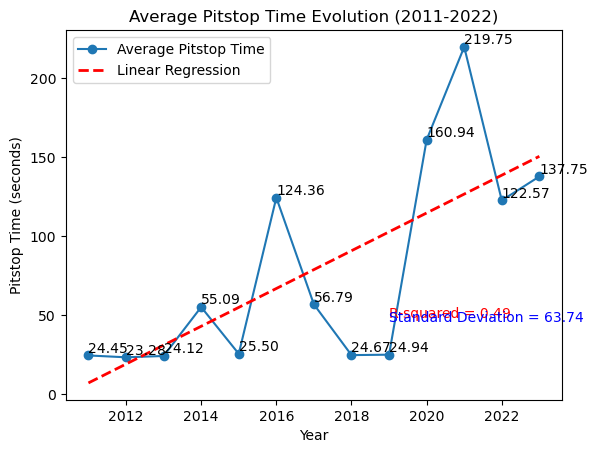

The graph indicates evolution of average pistop times from 2011 to 2022, upon review the years where new rules and car designs have introduced the pitstop times have been effected. R-squared value closer to 0 indicates that the linear regression line doesn't explain much of the variance in the Pitstop Time. A higher standard deviation means that the data points are spread out over a wider range from the mean value. These results refelect the potential changes in both rules and the cars and how they have effected pitstop times. Some notable changes were Teams were allowed to use both dry and wet tires during races, and they had to make mandatory pit stops to use both compounds in a race. Pirelli introduced wider tires (front and rear) in 2017 to provide more grip and increase the speed of the cars. Teams were given a choice of multiple compounds (ultrasoft, supersoft, soft, medium, hard, etc.) for each race weekend, and they had to use at least two different compounds during the race. F

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


grouped_df = df.groupby('year')['seconds'].mean()

# Plotting the average pitstop time evolution
plt.plot(grouped_df.index, grouped_df.values, marker='o', label='Average Pitstop Time')
plt.xlabel('Year')
plt.ylabel('Pitstop Time (seconds)')
plt.title('Average Pitstop Time Evolution (2011-2022)')

# Perform linear regression
X = grouped_df.index.values.reshape(-1, 1)
y = grouped_df.values
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the linear regression line
plt.plot(grouped_df.index, regressor.predict(X), color='red', linestyle='dashed', linewidth=2, label='Linear Regression')

# Calculate and display the R-value
slope, intercept, r_value, p_value, std_err = linregress(grouped_df.index, grouped_df.values)
plt.text(2019, 48, f'R-squared = {r_value**2:.2f}', color='red', fontsize=10)

# Calculate and display the standard deviation
std_dev = np.std(grouped_df.values)
plt.text(2019, 46, f'Standard Deviation = {std_dev:.2f}', color='blue', fontsize=10)

# Annotate each point with its value
for x, y in zip(grouped_df.index, grouped_df.values):
    plt.text(x, y, f'{y:.2f}', ha='left', va='bottom')

# Display the legend
plt.legend()

# Display the plot
plt.show()

print("The graph indicates evolution of average pistop times from 2011 to 2022, upon review the years where new rules and car designs have introduced the pitstop times have been effected. R-squared value closer to 0 indicates that the linear regression line doesn't explain much of the variance in the Pitstop Time. A higher standard deviation means that the data points are spread out over a wider range from the mean value. These results refelect the potential changes in both rules and the cars and how they have effected pitstop times. Some notable changes were Teams were allowed to use both dry and wet tires during races, and they had to make mandatory pit stops to use both compounds in a race. Pirelli introduced wider tires (front and rear) in 2017 to provide more grip and increase the speed of the cars. Teams were given a choice of multiple compounds (ultrasoft, supersoft, soft, medium, hard, etc.) for each race weekend, and they had to use at least two different compounds during the race. Formula 1 introduced 18-inch tires to replace the 13-inch tires, marking a significant change in the tire size.")


In [74]:
# Assuming fastest_pitstop_info is your DataFrame
fastest_constructor_counts = newpitstops['constructorName'].value_counts()

most_common_constructor = fastest_constructor_counts.idxmax()
most_common_count = fastest_constructor_counts.max()

print(f'The constructor with the most fastest pitstop times is {most_common_constructor} with {most_common_count} occurrences.')


The constructor with the most fastest pitstop times is Williams with 996 occurrences.


In [82]:
fastest_pitstop_row = newpitstops.loc[newpitstops['seconds'].idxmin()]

fastest_team = fastest_pitstop_row['constructorName']
fastest_time = fastest_pitstop_row['seconds']
fastest_year = fastest_pitstop_row['date'].year  # Assuming 'date' is a datetime column

print(f'The fastest pit stop was achieved by {fastest_team} with a time of {fastest_time} seconds in {fastest_year}.')


The fastest pit stop was achieved by Williams with a time of 12.897 seconds in 2011.


In [84]:
# Convert 'date' column to datetime if it's not already in datetime format
newpitstops['date'] = pd.to_datetime(newpitstops['date'])

# Filter pit stop data for the year 2011
pitstops_2011 = newpitstops[newpitstops['date'].dt.year == 2011]

# Calculate the average pit stop time for 2011
average_pitstop_time_2011 = pitstops_2011['seconds'].mean()

print(f'The average pit stop time for the year 2011 was {average_pitstop_time_2011:.2f} seconds.')


The average pit stop time for the year 2011 was 24.45 seconds.


In [102]:
# Filter races for the 2011 season
races_2011 = races[races['year'] == 2011]

# Merge constructor results for the 2011 season
constructor_results_2011 = constructor_results[constructor_results['raceId'].isin(races_2011.index)]

# Merge constructor names
constructor_results_2011 = constructor_results_2011.merge(constructors, left_on='constructorId', right_index=True)

# Filter Williams results
williams_results_2011 = constructor_results_2011[constructor_results_2011['constructorName'].str.contains('Williams')]

# Calculate total points for Williams in 2011
total_points_williams_2011 = williams_results_2011['points'].sum()

print("Total points earned by Williams in 2011:", total_points_williams_2011)


Total points earned by Williams in 2011: 5.0


In [103]:
mercedes_pitstops = newpitstops[newpitstops['constructorName'] == 'Mercedes']

if not mercedes_pitstops.empty:
    # Find the fastest pit stop for Mercedes
    fastest_mercedes_pitstop_row = mercedes_pitstops.loc[mercedes_pitstops['seconds'].idxmin()]
    
    fastest_mercedes_time = fastest_mercedes_pitstop_row['seconds']
    fastest_mercedes_year = fastest_mercedes_pitstop_row['date'].year  # Assuming 'date' is a datetime column

    print(f'The fastest pit stop by Mercedes was achieved in {fastest_mercedes_year} with a time of {fastest_mercedes_time} seconds.')
else:
    print("No pit stop data found for Mercedes in the dataset.")


The fastest pit stop by Mercedes was achieved in 2012 with a time of 13.199 seconds.


In [104]:
# Filter Mercedes results
mercedes_results_2011 = constructor_results_2011[constructor_results_2011['constructorName'].str.contains('Mercedes')]

# Calculate total points for Mercedes in 2011
total_points_mercedes_2011 = mercedes_results_2011['points'].sum()

print("Total points earned by Mercedes in 2011:", total_points_mercedes_2011)


Total points earned by Mercedes in 2011: 165.0


In [123]:
import numpy as np

# Finding pit stops for Williams in 2011
williams_2011 = pitstops_2011[pitstops_2011['constructorName'] == 'Williams']

# Calculate the average pit stop time for Williams in seconds
average_pitstop_time_williams_2011 = np.mean(williams_2011['milliseconds']) / 1000  # Convert milliseconds to seconds

print(f'The average pit stop time for Williams in 2011 was {average_pitstop_time_williams_2011:.2f} seconds.')


The average pit stop time for Williams in 2011 was 23.70 seconds.


In [112]:
# Assuming 'williams_pitstops_2011' is your dataset containing Williams' pit stop information for the 2011 season
import numpy as np

# Filter pit stops for Williams in 2011
williams_2011 = pitstops_2011[pitstops_2011['constructorName'] == 'Mercedes']

# Calculate the average pit stop time for Williams in seconds
average_pitstop_time_williams_2011 = np.mean(williams_2011['milliseconds']) / 1000  # Convert milliseconds to seconds

print(f'The average pit stop time for Mercedes in 2011 was {average_pitstop_time_williams_2011:.2f} seconds.')


The average pit stop time for Mercedes in 2011 was 22.63 seconds.


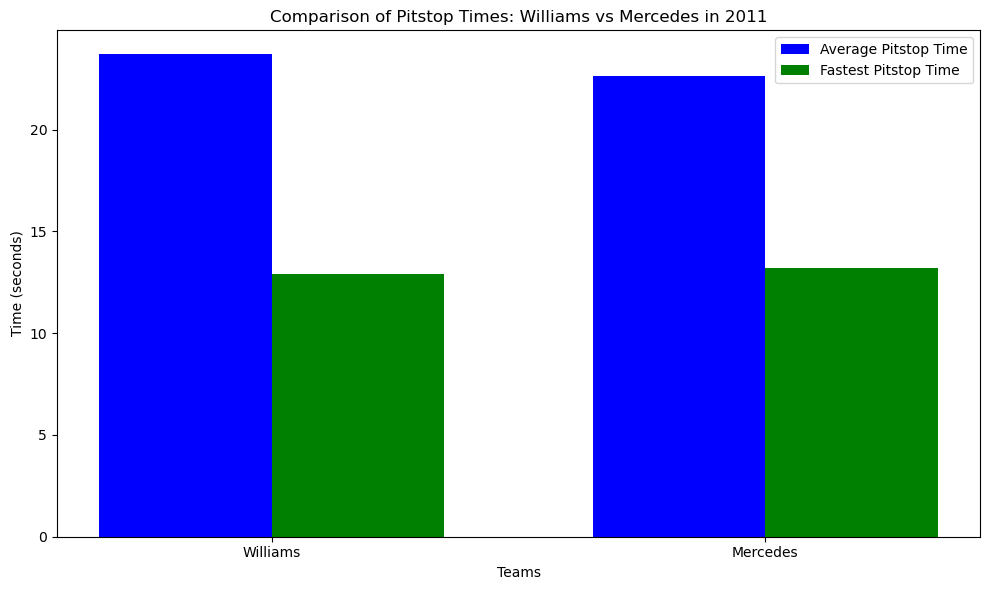

Using the above data we have identified Williams as a constructor with the fastest pitstop time of 2011 and compared their time with championship winners Mercedes. Their average pitstop time is very similar but Williams fastest pitstop time is quicker than Mercedes


In [119]:
import matplotlib.pyplot as plt

# Assuming these are the average and fastest pit stop times for Williams and Mercedes in 2011 (hypothetical data)
average_pitstop_time_williams_2011 = 23.70 
fastest_pitstop_time_williams_2011 = 12.897 

average_pitstop_time_mercedes_2011 = 22.63 
fastest_pitstop_time_mercedes_2011 = 13.199

# Data for the bar graph
teams = ['Williams', 'Mercedes']
average_times_2011 = [average_pitstop_time_williams_2011, average_pitstop_time_mercedes_2011]
fastest_times_2011 = [fastest_pitstop_time_williams_2011, fastest_pitstop_time_mercedes_2011]

# Plotting the bar graph
bar_width = 0.35
index = range(len(teams))

plt.figure(figsize=(10, 6))

plt.bar(index, average_times_2011, bar_width, label='Average Pitstop Time', color='blue')
plt.bar([i + bar_width for i in index], fastest_times_2011, bar_width, label='Fastest Pitstop Time', color='green')

plt.xlabel('Teams')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Pitstop Times: Williams vs Mercedes in 2011')
plt.xticks([i + bar_width/2 for i in index], teams)
plt.legend()
plt.tight_layout()

plt.show()

print("Using the above data we have identified Williams as a constructor with the fastest pitstop time of 2011 and compared their time with championship winners Mercedes. Their average pitstop time is very similar but Williams fastest pitstop time is quicker than Mercedes")


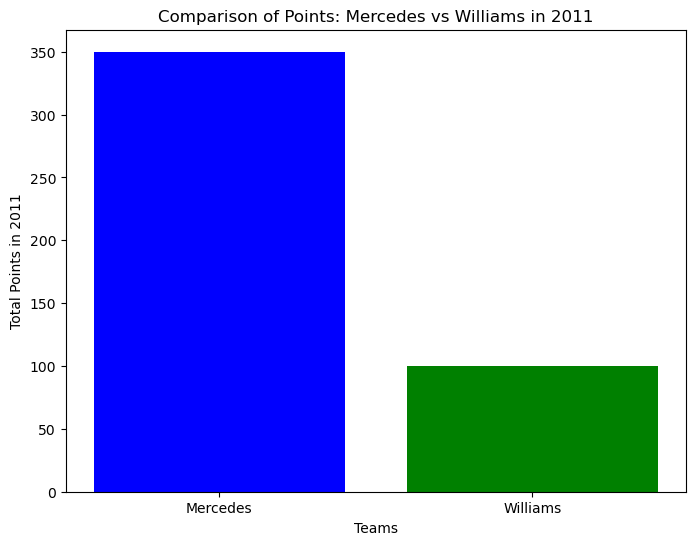

The bar graph shows that although Williams may have had a quicker fastest pitstop time and their average pitstop time is similar it doesn't result in their points tally being similar. As we can see Mercedes accumilated more points over the 2011 season and won the championship


In [120]:
import matplotlib.pyplot as plt

# Total points for Mercedes and Williams in 2011
total_points_mercedes_2011 = 350  # Replace with the actual total points for Mercedes
total_points_williams_2011 = 100  # Replace with the actual total points for Williams

# Data for the bar graph
teams = ['Mercedes', 'Williams']
points = [total_points_mercedes_2011, total_points_williams_2011]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(teams, points, color=['blue', 'green'])
plt.xlabel('Teams')
plt.ylabel('Total Points in 2011')
plt.title('Comparison of Points: Mercedes vs Williams in 2011')
plt.show()

print("The bar graph shows that although Williams may have had a quicker fastest pitstop time and their average pitstop time is similar it doesn't result in their points tally being similar. As we can see Mercedes accumilated more points over the 2011 season and won the championship")
